In [ ]:
# Importing required libraries
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# Reading the dataset

In [ ]:
# Downloading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Introducing noise to the images

In [ ]:
# Adding noise to images
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

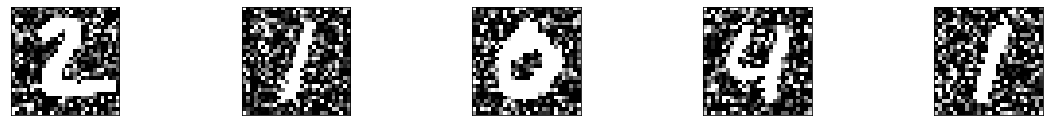

In [ ]:
# Plotting some noisy images
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Defining the Autoencoder

In [ ]:
# Defining autoencoder

model = Sequential()

# Encoder network

model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

# Decoder network

model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 35)        350       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 35)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        7900      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 25)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 25)       0

# Training the Autoencoder

In [ ]:
# Training the autoencoder
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 16s 9ms/step - loss: -485.1426 - val_loss: -508.0681
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: -501.9418 - val_loss: -509.7198
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: -502.7858 - val_loss: -510.3387
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: -503.3001 - val_loss: -510.7036
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: -503.5251 - val_loss: -510.8406
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: -503.6996 - val_loss: -511.0139
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: -503.8268 - val_loss: -511.0971
Epoch 8/15
469/469 [==============================] - 4s 8ms/step - loss: -503.9319 - val_loss: -511.1726
Epoch 9/15
469/469 [==============================] - 4s 8ms/step - loss: -503.9924 - val_loss: -511.2249
Epoch 10/15
469/469 [========================

# Generating denoised images

In [ ]:
# Making predictions with trained autoencoder to generate denoised image
pred = model.predict(x_test_noisy)

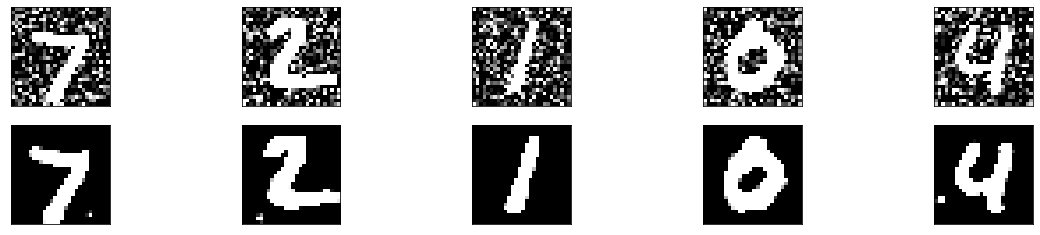

In [ ]:
# Checking results
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()